# Seaborn

In [2]:
# Statistical Plotting Library
# Built on top of Matplotlib
# Works well with DataFrames

In [3]:
# From Conda Shell install using
# conda install seaborn

### Distribution Plots

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [8]:
tips = sns.load_dataset('tips') # built in data set
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


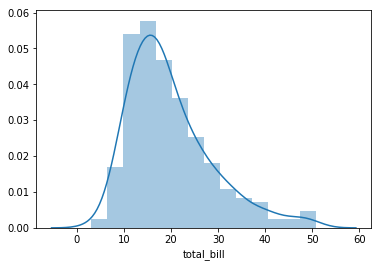

In [9]:
sns.distplot(tips['total_bill'])

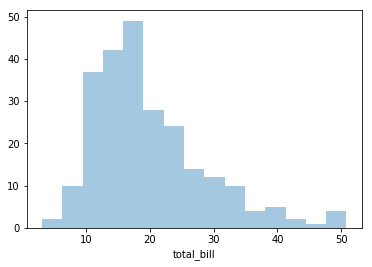

In [14]:
# Remove Kernel Density Estimate
# Set Bins
sns.distplot(tips['total_bill'],kde=False,bins = 15) 

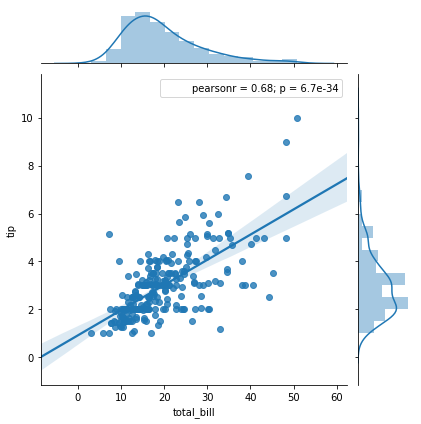

In [21]:
# Combines 2 distributions and draws a scatter plot
# kind = scatter (default)
# Other options = hex (color coded)
#               = reg (regression line)
#               = kde (kernel density estimate)
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

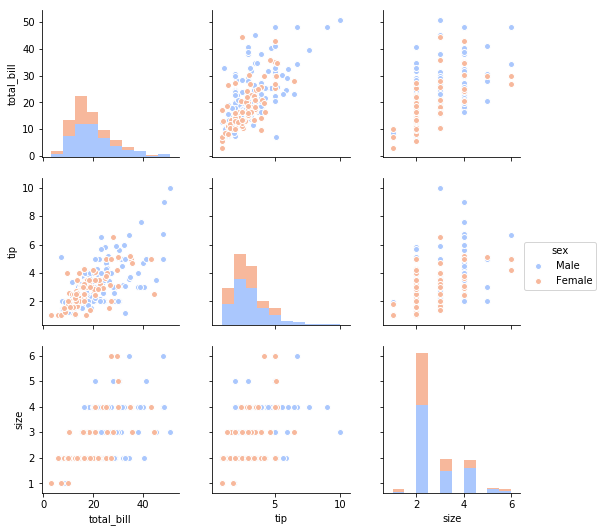

In [24]:
# Plots all numerical values in pairs
# For same X and Y axis, it does a histogram
# hue argument to color code by categorial data
sns.pairplot(tips,hue='sex',palette='coolwarm')

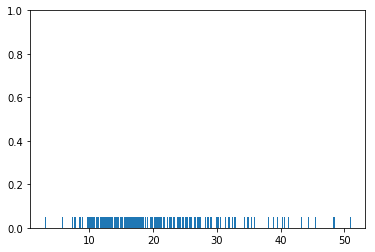

In [25]:
# rugplot similar to histogram but adds a tick for each value
sns.rugplot(tips['total_bill'])

### Categorical Plots

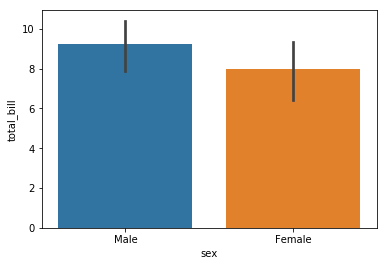

In [30]:
# By default this will show the mean, 
# but you can change this using estimator
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

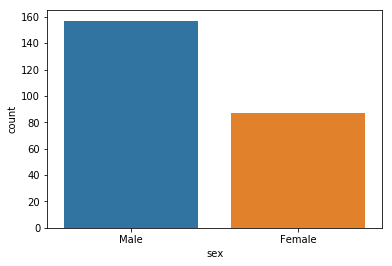

In [32]:
# Y=axis is already chosen. It counts the occurances
sns.countplot(x='sex',data=tips)

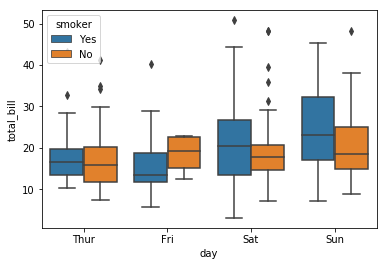

In [36]:
# Boxplot with 2 categories
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

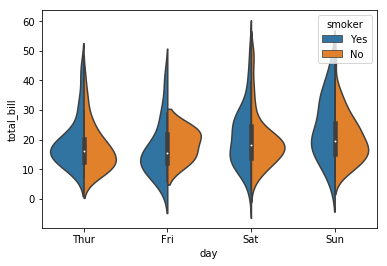

In [41]:
# violinplot is similar to box plot
# split: plots the 2 hues on each side, 
# otherwise it plots side by side
sns.violinplot(x='day',y='total_bill'
               ,data=tips,hue='smoker',split=True)

C:\Users\salma\Anaconda3\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


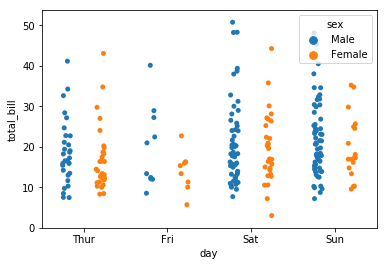

In [46]:
# Jitter
sns.stripplot(x='day',y='total_bill',data=tips
              ,jitter=True,hue='sex',split=True)

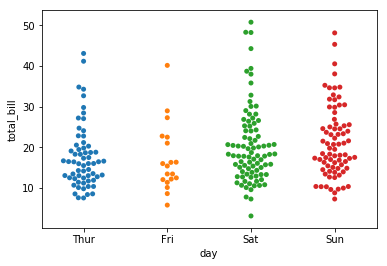

In [47]:
# Combination of strip plot and violin plot
sns.swarmplot(x='day',y='total_bill',data=tips)

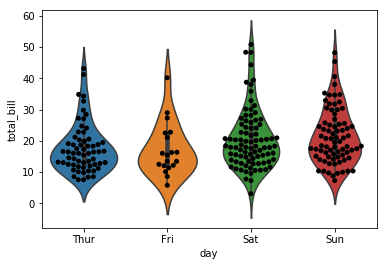

In [49]:
# To show Violin plot and Swarm Plot together
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

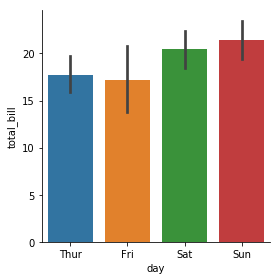

In [55]:
# Factor Plot
# generalized form
# other options or kind are violin, etc.
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

## Matric Plots
### Heat plots

In [58]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [63]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


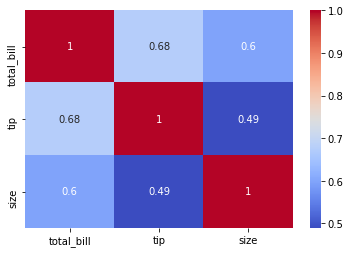

In [67]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [69]:
fpvt = flights.pivot_table(index='year',columns='month',values='passengers')
fpvt

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


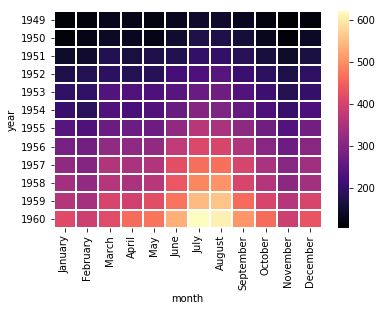

In [75]:
# Linecolor and Linewidth allows us to show separation
sns.heatmap(fpvt,cmap='magma',linecolor='white',linewidth=1)

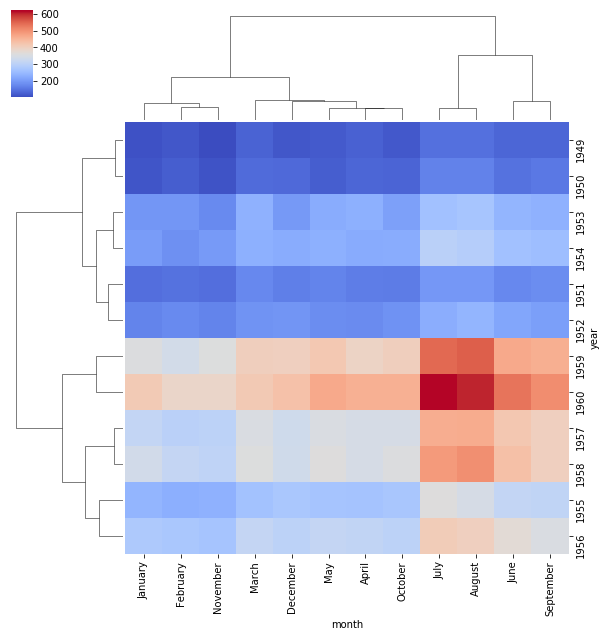

In [82]:
# Shows hierarchical clusters 
# most similar month and years are put together
# below result shows that 1959 and 1960 aare similar and 
# so are July and August
sns.clustermap(fpvt,cmap='coolwarm')
               #,standard_scale=1)
# stansard_scale normalizes everythign to 1 
# instead of number of passengers

## Grids

In [84]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [87]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

C:\Users\salma\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


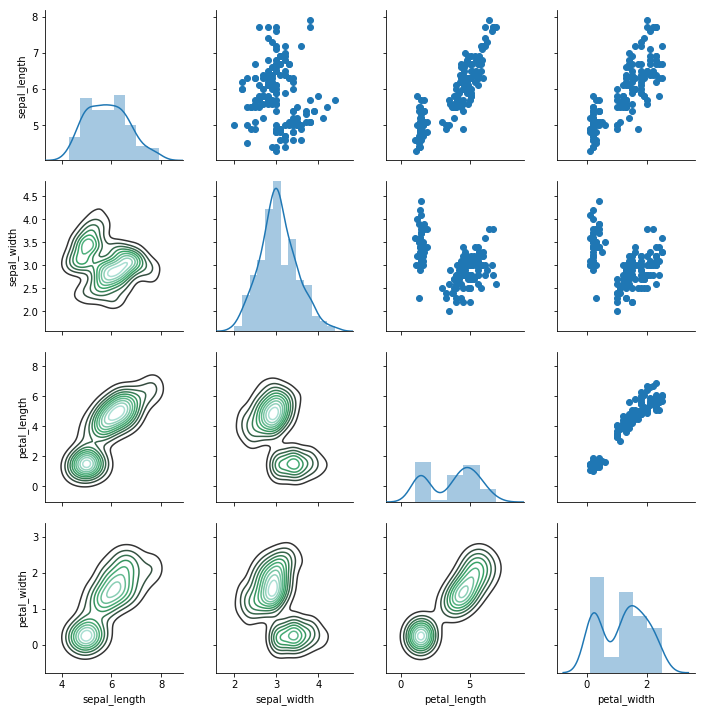

In [104]:
# Pait Plot with grids
# instead of sns.pairplot(iris)
g = sns.PairGrid(iris)
#g.map(plt.scatter)

# below will give control overv what we want to plot where
# more flexibility than just a pair_plot
# Usually we stick to pair_plots but 
# this can be used for more flexibility
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [105]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


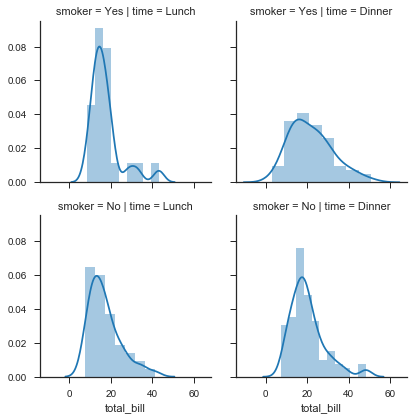

In [143]:
# Plot Grid rows are divided by smoker
# Plot Grid columns are divided by time (lunch/dinner)
# actual plot is specified next, i.e. total_bill
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')
# Note, instead of sns.distplot, I could have also used plt.hist as in exercise example

## Regression Plots

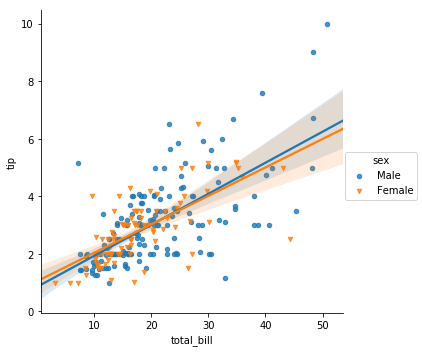

In [115]:
# Linear Model Plor (lmplot)
# seaborn is just calling matplotlib under the hood
# scatter_kws: used to call underlying matplotlib variables
# s = marker size (you will need to refer to dicumentation)
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex'
          ,markers=['o','v'],scatter_kws={'s':20})

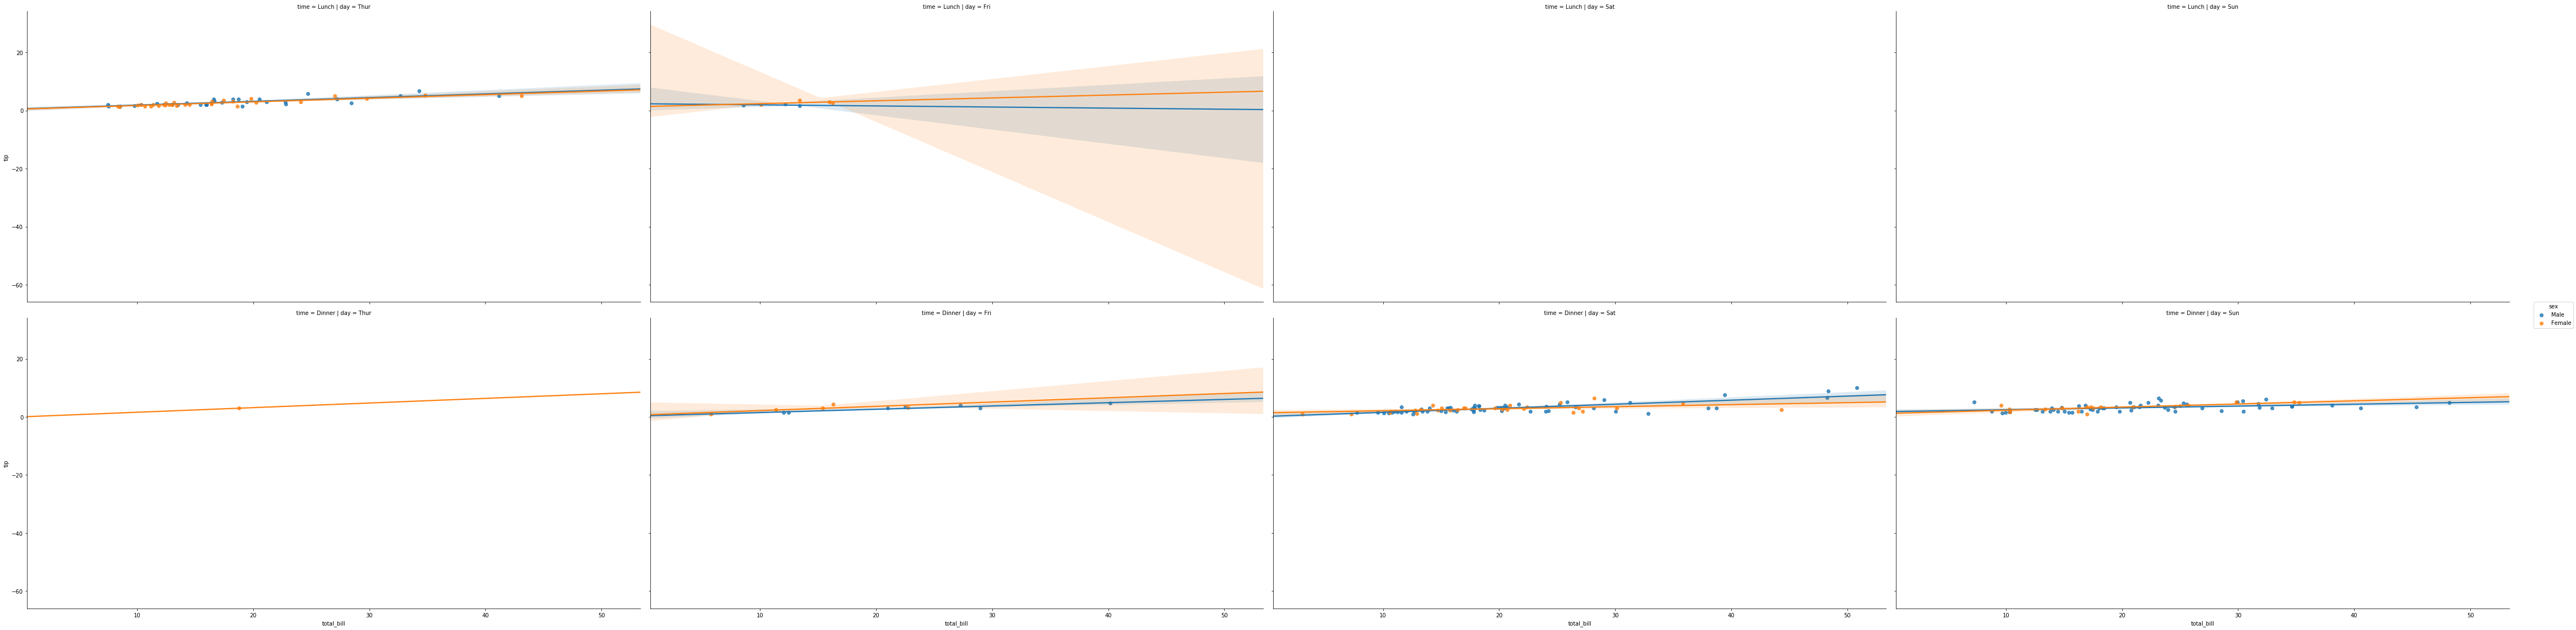

In [120]:
# More customiztion
# instead of hue, we use cols and rows (like FacetGrid)
# Aspect Rario = height/width
sns.lmplot(x='total_bill',y='tip',data=tips,
           col='day',row='time',hue='sex'
          ,aspect=2,size=8)

### Style and Color

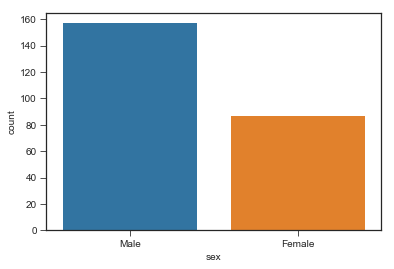

In [129]:
# check documentation for set_style
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
# removes the axis lines
#sns.despine(left=True,bottom=True)

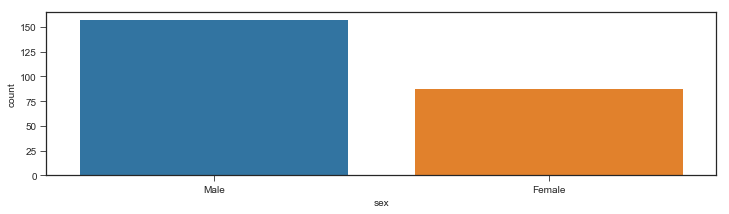

In [133]:
# can use plt.figure from Matplotlib to set 
# figure size in conjunction with Seaborn
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

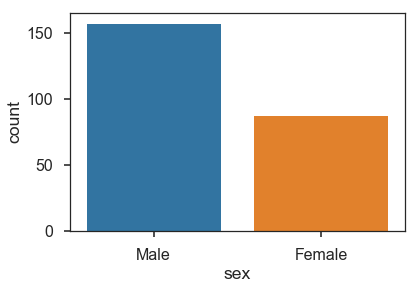

In [137]:
# Default contect is a notebook
# this will adjust the figure depending on 
# where you want to eventuallly show it
sns.set_context('poster',font_scale=1)
sns.countplot(x='sex',data=tips)

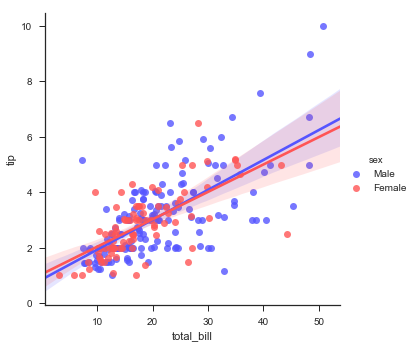

In [142]:
# Reset contect to notebook
# palette string - google it
sns.set_context('notebook')
sns.lmplot(x='total_bill',y='tip',data=tips
           ,hue='sex',palette='seismic')